In [1]:
from PIL import Image
from sklearn.preprocessing import binarize
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from selenium import webdriver
from io import BytesIO
from bs4 import BeautifulSoup as bs
from IPython.display import clear_output
import matplotlib.pyplot as plt
import cv2,time,requests,time, scipy
import numpy as np 
import pyscreenshot as ImageGrab
import os,imageio

In [2]:
def auto_grab_img(url,name):
    time.sleep(1)
    driver = webdriver.Chrome('G:/WebScraping/Project_HSPR/driver/chromedriver.exe')
    # driver = webdriver.Firefox(executable_path='G:/WebScraping/Project_HSPR/driver/geckodriver.exe')
    # driver = webdriver.Chrome('/home/james/Program/WebScraping/Project_HSPR/driver/chromedriver')
    driver.get(url)
    try:
        driver.find_element_by_xpath('/html/body/div[3]/div[2]/div[1]/div[1]/div[2]/table/tbody/tr/td/input').click()
    except Exception as e: 
        print(str(e))
        pass
    element = driver.find_element_by_tag_name('img')
    left = element.location['x'] + 150
    right = left + element.size['width'] + 30
    top = element.location['y']  + driver.execute_script('return window.outerHeight - window.innerHeight;') + 160
    bottom = top + element.size['height'] + 16
    time.sleep(3)
    img = ImageGrab.grab(bbox=(left, top, right, bottom))
    img.save('trainingdata/unfinished_label/' + str(name)+ '.png')
#     img.show()
#     plt.imshow(img)
#     plt.show()
    driver.quit()

In [7]:
# learn from https://www.youtube.com/watch?v=4DHcOPSfC4c&feature=youtu.be
def cancel_noise(path):
    try:
        img = cv2.imread(path)
        dst = cv2.fastNlMeansDenoisingColored(img,None,25,25,7,21)
        plt.imshow(img)
        plt.show()
        ret, thresh = cv2.threshold(dst,127,255,cv2.THRESH_BINARY_INV)
        imgarr = cv2.cvtColor(thresh, cv2.COLOR_BGR2GRAY)
        rang = imgarr.shape
        imgarr[:,3:rang[1]-3] = 0 #no need for too much
        imagedata = np.where(imgarr == 255)
        X = np.array([imagedata[1]])
        Y = rang[0] - imagedata[0]
        poly_reg = PolynomialFeatures(degree = 2)
        X_ = poly_reg.fit_transform(X.T)
        regr = LinearRegression()
        regr.fit(X_, Y)

        X2 = np.array([[i for i in range(0,rang[1])]])
        X2_ = poly_reg.fit_transform(X2.T)
        newimg = cv2.cvtColor(thresh, cv2.COLOR_BGR2GRAY)
        for ele in np.column_stack([regr.predict(X2_).round(0),X2[0],]):
            pos = rang[0]-int(ele[0])
    #         newimg[pos-3:pos+3,int(ele[1])] = 0
            newimg[pos-3:pos+3,int(ele[1])] = 255 - newimg[pos-3:pos+3,int(ele[1])]
        return thresh, newimg
    except:
        return -1,-1

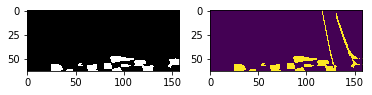

In [9]:
url = 'https://irs.thsrc.com.tw/IMINT/'
for i in range(300,400):
    auto_grab_img(url,i)
    thresh, newimg = cancel_noise('trainingdata/unfinished_label/' + str(i)  + '.png')
    if type(newimg) != int:
        print(type(newimg))
        print(newimg.shape)
        clear_output(wait=True)
        plt.subplot(121)
        plt.imshow(thresh)
        plt.subplot(122)
        plt.imshow(newimg)
        plt.show()
        imageio.imwrite('trainingdata/unfinished_label/' + str(i) + '_label' + '.png', newimg)
# newimg.imsave('trainingdata/' + str(i) + '_label' + '.png')

In [ ]:
path = 'G:/WebScraping/Project_HSPR/trainingdata/unfinished_label/'
def reshape_image(path):
    for filename in os.listdir(path):
            img = imageio.imread(path + filename)
            newimglist = []

            for i in range(img.shape[0]):
                newimglist.append(list(img[i]))
            if img.shape[1] > 160:
                for i in range(img.shape[0]):
                    newimglist[i] = list(img[i][:160])
            elif img.shape[1] < 160:
                extendNum = 160 - img.shape[1]
                for i in range(img.shape[0]):
                    newimglist[i].extend([0] * extendNum)
            if img.shape[0] > 60:
                newimglist = newimglist[:60]
            elif img.shape[0] < 60:
                for _ in range(60 - img.shape[0]):
                    newimglist.extend([[0] * 160])
            img =  np.asarray(newimglist)
            imageio.imwrite('trainingdata/reshaped_label/' + filename  + '.png', img)
# for filename in os.listdir(path):
#     img = imageio.imread(path + filename)
#     print(img.shape)

In [26]:
# Using Selenium but seem fail
# 

# import pyautogui
# import urllib
# import urllib.request
# import html.parser
# import requests
# from requests.exceptions import HTTPError
# from socket import error as SocketError
# from http.cookiejar import CookieJar

# from selenium.webdriver import ActionChains 
# from selenium.webdriver.common.keys import Keys
# from selenium import webdriver
# driver = webdriver.Firefox(executable_path='G:/WebScraping/Project_HSPR/driver/geckodriver.exe')
# 
# driver = webdriver.Chrome('G:/WebScraping/Project_HSPR/driver/chromedriver.exe')
# driver.get('https://irs.thsrc.com.tw/IMINT/')
# try:
#     driver.find_element_by_xpath('/html/body/div[3]/div[2]/div[1]/div[1]/div[2]/table/tbody/tr/td/input').click()
# except Exception as e: 
#     print(str(e))
#     pass

# driver.get("http://stackoverflow.com/questions")
# question = driver.find_element_by_link_text("Questions")
# y_relative_coord = question.location['y']
# browser_navigation_panel_height = driver.execute_script('return window.outerHeight - window.innerHeight;')
# y_absolute_coord = y_relative_coord + browser_navigation_panel_height
# x_absolute_coord = question.location['x']


# driver = webdriver.Chrome('G:/WebScraping/Project_HSPR/driver/chromedriver.exe')
# driver.get('https://www.google.com.tw/')
# # driver.set_window_size(480, 320)
# driver.maximize_window()
# png = driver.get_screenshot_as_png()

# element = driver.find_element_by_id('hplogo')
# baseLocation = driver.get_window_position()
# print(baseLocation)
# print(driver.get_window_size())
# left = element.location['x'] 
# right = left + element.size['width']
# top = element.location['y'] + driver.execute_script('return window.outerHeight - window.innerHeight;') 
# bottom = top + element.size['height']
# img = Image.open(BytesIO(png))
# img = img.crop((left, top, right, bottom))
# img.show()

# driver = webdriver.Chrome('G:/WebScraping/Project_HSPR/driver/chromedriver.exe')
# # driver.set_window_size(1536, 867)
# driver.get('https://irs.thsrc.com.tw/IMINT/')
# try:
#     driver.find_element_by_xpath('/html/body/div[3]/div[2]/div[1]/div[1]/div[2]/table/tbody/tr/td/input').click()
# except Exception as e: 
#     print(str(e))
#     pass
# png = driver.get_screenshot_as_png()
# element = driver.find_element_by_id('BookingS1Form_homeCaptcha_passCode')


# print(element.location)
# print(element.size)
# left = element.location['x']
# right = element.location['x'] + element.size['width']
# top = element.location['y']
# bottom = element.location['y'] + element.size['height']


# left, right, top, bottom



# img = Image.open(BytesIO(png))
# img = img.crop((left, top, right, bottom))
# img.show()

In [19]:
# url = 'https://www.google.com.tw/'
# driver = webdriver.Chrome('G:/WebScraping/Project_HSPR/driver/chromedriver.exe')

# driver.get(url)
# img = driver.find_element_by_tag_name('img')
# browser_navigation_panel_height = driver.execute_script('return window.outerHeight - window.innerHeight;')
# pyautogui.click(img.location['x'], img.location['y'] + browser_navigation_panel_height, button='right')
# ActionChains(driver).send_keys('v').perform()

# img = ImageGrab.grab()
# im.save('screenshot.png')
# element = driver.find_element_by_tag_name('img')
# left = element.location['x'] 
# right = left + element.size['width']
# top = element.location['y']  + driver.execute_script('return window.outerHeight - window.innerHeight;') 
# bottom = top + element.size['height']
# img = ImageGrab.grab(bbox=(left, top, right, bottom))
# img.show()
# img2 = ImageGrab.grab()
# img2.show()

# ActionChains(driver) \
#     .click(element) \v
#     .key_down(Keys.CONTROL) \
#     .send_keys('s') \
#     .key_up(Keys.CONTROL) \
#     .send_keys(Keys.ENTER) \
#     .perform()
# ActionChains(driver).context_click(img).send_keys('v').perform()
# time.sleep(10) # Pause to allow you to inspect the browser.
# driver.quit()

# driver.find_element_by_tag_name('img')
# actionChains = ActionChains(driver)
# actionChains.send_keys(Keys.CONTROL,'s').perform()
# actionChains.send_keys(Keys.ENTER).perform()


# img = driver.find_element_by_tag_name('input')
# driver.find_element_by_tag_name('input')

# actionChains.move_to_element(img).context_click().perform()
# ele = driver.find_element_by_tag_name('img')

# driver.find_element_by_tag_name.click(
# name = driver.find_element_by_tag_name("input")
# actions = ActionChains(driver).move_to_element(name).send_keys(Keys.CONTROL + "s")
# actionChains).perform()
# actionChains.send_keys(Keys.CONTROL + "s")
# time.sleep(0.1)
# actionChains.send_keys(Keys.DOWN).perform()
# 




# img2 = ImageGrab.grab()
# img2.show()

# soup = bs(driver.page_source, 'html.parser')
# img_url = soup.img['src']
# print(img_url)
# img_url = url + ';' + img_url.split(';')[1]
# print(img_url)
# driver.get(img_url)


# element = driver.find_element_by_tag_name('img')
# left = element.location['x'] 
# right = left + element.size['width']
# top = element.location['y']  + driver.execute_script('return window.outerHeight - window.innerHeight;') 
# bottom = top + element.size['height']
# img = ImageGrab.grab(bbox=(left, top, right, bottom))
# img.show()


# img = driver.find_element_by_tag_name('img')
# browser_navigation_panel_height = driver.execute_script('return window.outerHeight - window.innerHeight;')
# pyautogui.click(img.location['x'], img.location['y'] + browser_navigation_panel_height, button='right')



# ActionChains(driver) \
#     .key_down(Keys.CONTROL) \
#     .send_keys('s') \
#     .key_up(Keys.CONTROL) \
#     .send_keys(Keys.ENTER) \
#     .perform()



# ActionChains(driver).send_keys(Keys.DOWN).perform()

# actionChains = ActionChains(driver)
# actionChains.send_keys(Keys.LEFT_CONTROL,'s')
# actionChains.context_click(driver.find_element_by_tag_name('img')).perform()
# time.sleep(1)
# actionChains.send_keys(Keys.DOWN).perform()
# actionChains.send_keys(Keys.DOWN).perform()
# actionChains.send_keys(Keys.ENTER).perform()
# actionChains

# .send_key(Keys.CONTROL, "v").build()
# .context_click().send_keys(Keys.ARROW_DOWN).send_keys(Keys.ARROW_DOWN).send_keys(Keys.RETURN)

# with open("/Path/to/saved/file.jpg", "wb") as f:
#     f.write(requests.get(URL).content)
# element = driver.find_element_by_tag_name('img')
# driver.save_screenshot('capture.png')



# try:
#     req=urllib.request.Request(img_url, None, {
#         'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36'
#     })
#     cj = CookieJar()
#     opener = urllib.request.build_opener(urllib.request.HTTPCookieProcessor(cj))
#     response = opener.open(req)
#     raw_response = response.read().decode('utf8', errors='ignore')
#     response.close()
# except Except as e:
#     print(e)